In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt

from keras import backend as K

Using TensorFlow backend.


In [2]:
# global params
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# normalize train data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [9]:
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 7s 16ms/step - loss: 2.2773 - accuracy: 0.1549 - val_loss: 2.2374 - val_accuracy: 0.2792
Epoch 2/12
469/469 [==============================] - 7s 15ms/step - loss: 2.2157 - accuracy: 0.2611 - val_loss: 2.1610 - val_accuracy: 0.4492
Epoch 3/12
469/469 [==============================] - 7s 15ms/step - loss: 2.1354 - accuracy: 0.3563 - val_loss: 2.0593 - val_accuracy: 0.5550
Epoch 4/12
469/469 [==============================] - 7s 15ms/step - loss: 2.0292 - accuracy: 0.4388 - val_loss: 1.9246 - val_accuracy: 0.6428
Epoch 5/12
469/469 [==============================] - 7s 15ms/step - loss: 1.8965 - accuracy: 0.5083 - val_loss: 1.7560 - val_accuracy: 0.6872
Epoch 6/12
469/469 [==============================] - 7s 15ms/step - loss: 1.7344 - accuracy: 0.5618 - val_loss: 1.5592 - val_accuracy: 0.7184
Epoch 7/12
469/469 [==============================] - 7s 15ms/step - loss: 1.5653 - accuracy: 0.5976 - val_loss: 1.3565 - val_accuracy: 0.7505

In [10]:
test_history = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_history[0])
print('Test accuracy:', test_history[1])

Test loss: 0.7317842245101929
Test accuracy: 0.8334000110626221


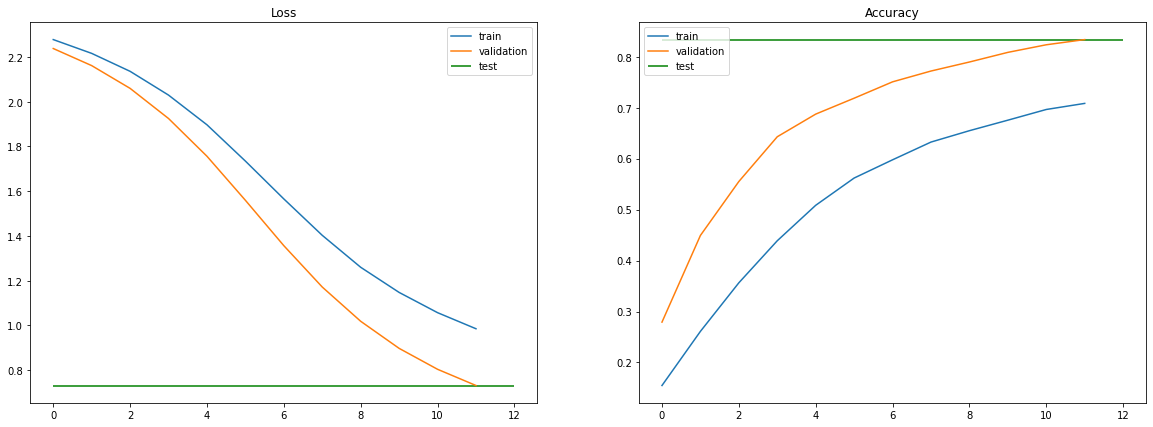

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

ax[0].plot(train_history.history["loss"], label="train")
ax[0].plot(train_history.history["val_loss"], label="validation")
ax[0].hlines(
    y=test_history[0],
    xmin=0,
    xmax=len(train_history.history["loss"]),
    colors="green",
    label="test"
)
ax[0].legend(loc=0)
ax[0].set_title("Loss")

ax[1].plot(train_history.history["accuracy"], label="train")
ax[1].plot(train_history.history["val_accuracy"], label="validation")
ax[1].hlines(
    y=test_history[1],
    xmin=0,
    xmax=len(train_history.history["loss"]),
    colors="green",
    label="test"
)
ax[1].legend(loc=0)
ax[1].set_title("Accuracy")

plt.show()